<a href="https://colab.research.google.com/github/KGANESHKUMARK/PythonBits/blob/main/Group100_UCINewsAggregatorDataset_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Assignment 2 - Problem Statement E_News
### UCI News Aggregator Dataset

In [ ]:
### Group ID: 100
### Group Members Name with Student ID:#
from IPython.display import display, HTML
html_content = """

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <style>
        .table {
            display: table;
            width: 70%;
            border-collapse: collapse;
        }
        .table-row {
            display: table-row;
        }
        .table-cell {
            display: table-cell;
            border: 1px solid #dddddd;
            padding: 8px;
        }
        .header {
            background-color: #fffff;
            font-weight: bold;
            font-size: 100%;
        }
    </style>
</head>
<body>
 <h3>Group ID: 100</h3>
 <h3>Group Members Name with Student ID:</h3>

<div class="table" style="float: left">
    <div class="table-row header">
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Name</div>
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Email ID</div>
    </div>
    <div class="table-row">
        <div class="table-cell">1.</div>
        <div class="table-cell">GANESHKUMAR KARUPPAIAH</div>
        <div class="table-cell">2023aa05600</div>
        <div class="table-cell">2023aa05600@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">2.</div>
        <div class="table-cell">KOLLURI VENKATESWARA SWAROOP</div>
        <div class="table-cell">2023aa05945</div>
        <div class="table-cell">2023aa05945@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">3.</div>
        <div class="table-cell">RAJESH J</div>
        <div class="table-cell">2023aa05859</div>
        <div class="table-cell">2023aa05859@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">4.</div>
        <div class="table-cell">VIJAYA LAKSHMI R</div>
        <div class="table-cell">2023aa05341</div>
        <div class="table-cell">2023aa05341@wilp.bits-pilani.ac.in</div>
    </di    v>
</d
</div>
</html>
"""
display(HTML(html_content))

# Task 1 : Load the dataset, select the first 5000 rows, and perform a comprehensive Exploratory Data Analysis (EDA) followed by necessary preprocessing steps.

In [ ]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
import warnings
from scipy.stats import chi2_contingency

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:

# Load the dataset
file_path = '/content/uci-news-aggregator.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Select the first 5000 rows
df = df.head(5000)

In [ ]:
# Perform EDA

# Display basic information about the dataset, data types and non-null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5000 non-null   int64  
 1   TITLE      5000 non-null   object 
 2   URL        5000 non-null   object 
 3   PUBLISHER  4999 non-null   object 
 4   CATEGORY   5000 non-null   object 
 5   STORY      5000 non-null   object 
 6   HOSTNAME   5000 non-null   object 
 7   TIMESTAMP  5000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB
None


In [ ]:
# Check for missing values
print(df.isnull().sum())

ID           0
TITLE        0
URL          0
PUBLISHER    1
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64


In [ ]:
# Obtain dimensions
df.shape

(5000, 8)

In [ ]:
#### Eliminate irrelevant information
df.drop(["ID","URL"], axis = 1, inplace = True)
df.head()

,TITLE,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,"Fed official says weak data caused by weather,...",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,Fed's Charles Plosser sees high bar for change...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 156 (\x9c) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 148 (\x94) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-input-41-118929f10a57>:37: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout(pad=3.0)  # Adjusted padding
<ipython-inpu

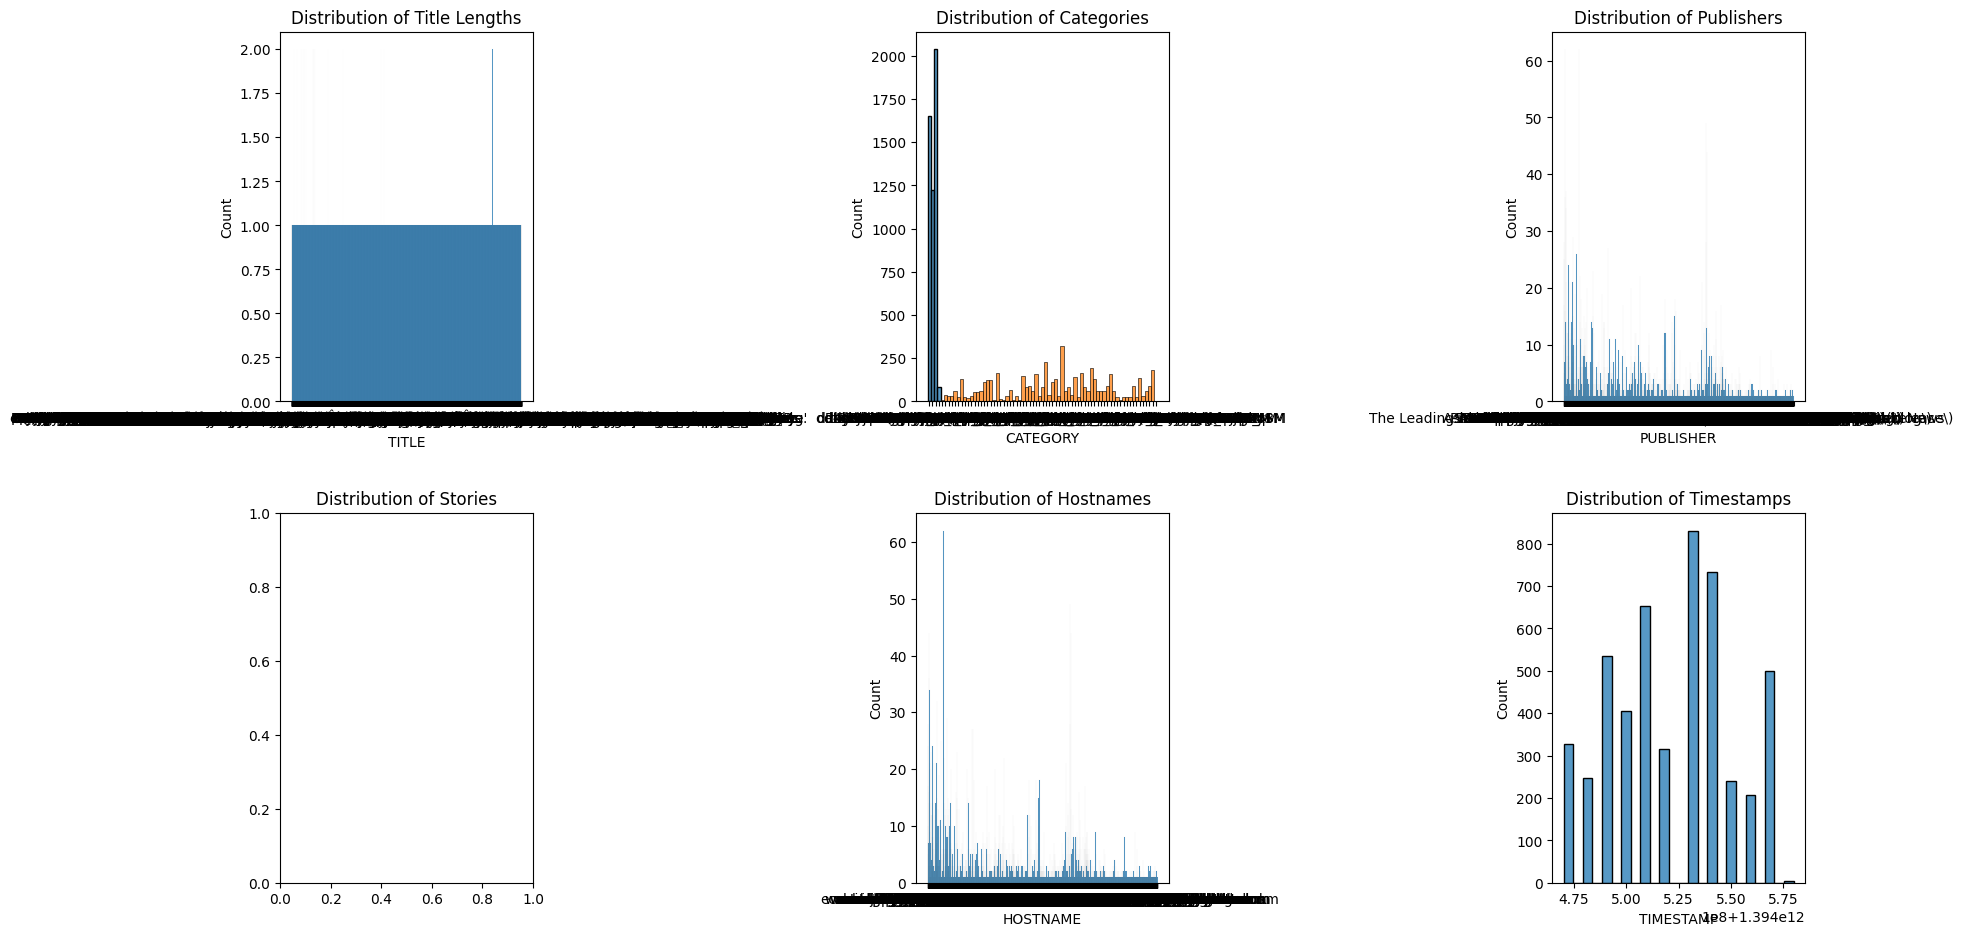

In [ ]:

# Set the font to Arial Unicode MS to support a wider range of characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# import warnings
# # Suppress specific warnings about missing glyphs
# warnings.filterwarnings("ignore", message="Glyph .* missing from font(s)")


# Sample the data to speed up plotting
sampled_df = df.sample(n=100, random_state=42)  # Adjust the sample size as needed

# Analysis of univariate Categorical variables

# Example with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Adjusted figure size

# Plotting different columns
sns.histplot(ax=axes[0, 0], data=df, x="TITLE", bins=50)
axes[0, 0].set_title('Distribution of Title Lengths')

sns.histplot(ax=axes[0, 1], data=df, x="CATEGORY")
axes[0, 1].set_title('Distribution of Categories')

sns.histplot(ax=axes[0, 2], data=df, x="PUBLISHER")
axes[0, 2].set_title('Distribution of Publishers')

sns.histplot(ax=axes[0, 1], data=df, x="STORY")
axes[1, 0].set_title('Distribution of Stories')

sns.histplot(ax=axes[1, 1], data=df, x="HOSTNAME")
axes[1, 1].set_title('Distribution of Hostnames')

sns.histplot(ax=axes[1, 2], data=df, x="TIMESTAMP")
axes[1, 2].set_title('Distribution of Timestamps')

# Adjust the layout
plt.tight_layout(pad=3.0)  # Adjusted padding

# Show the plot
plt.show()

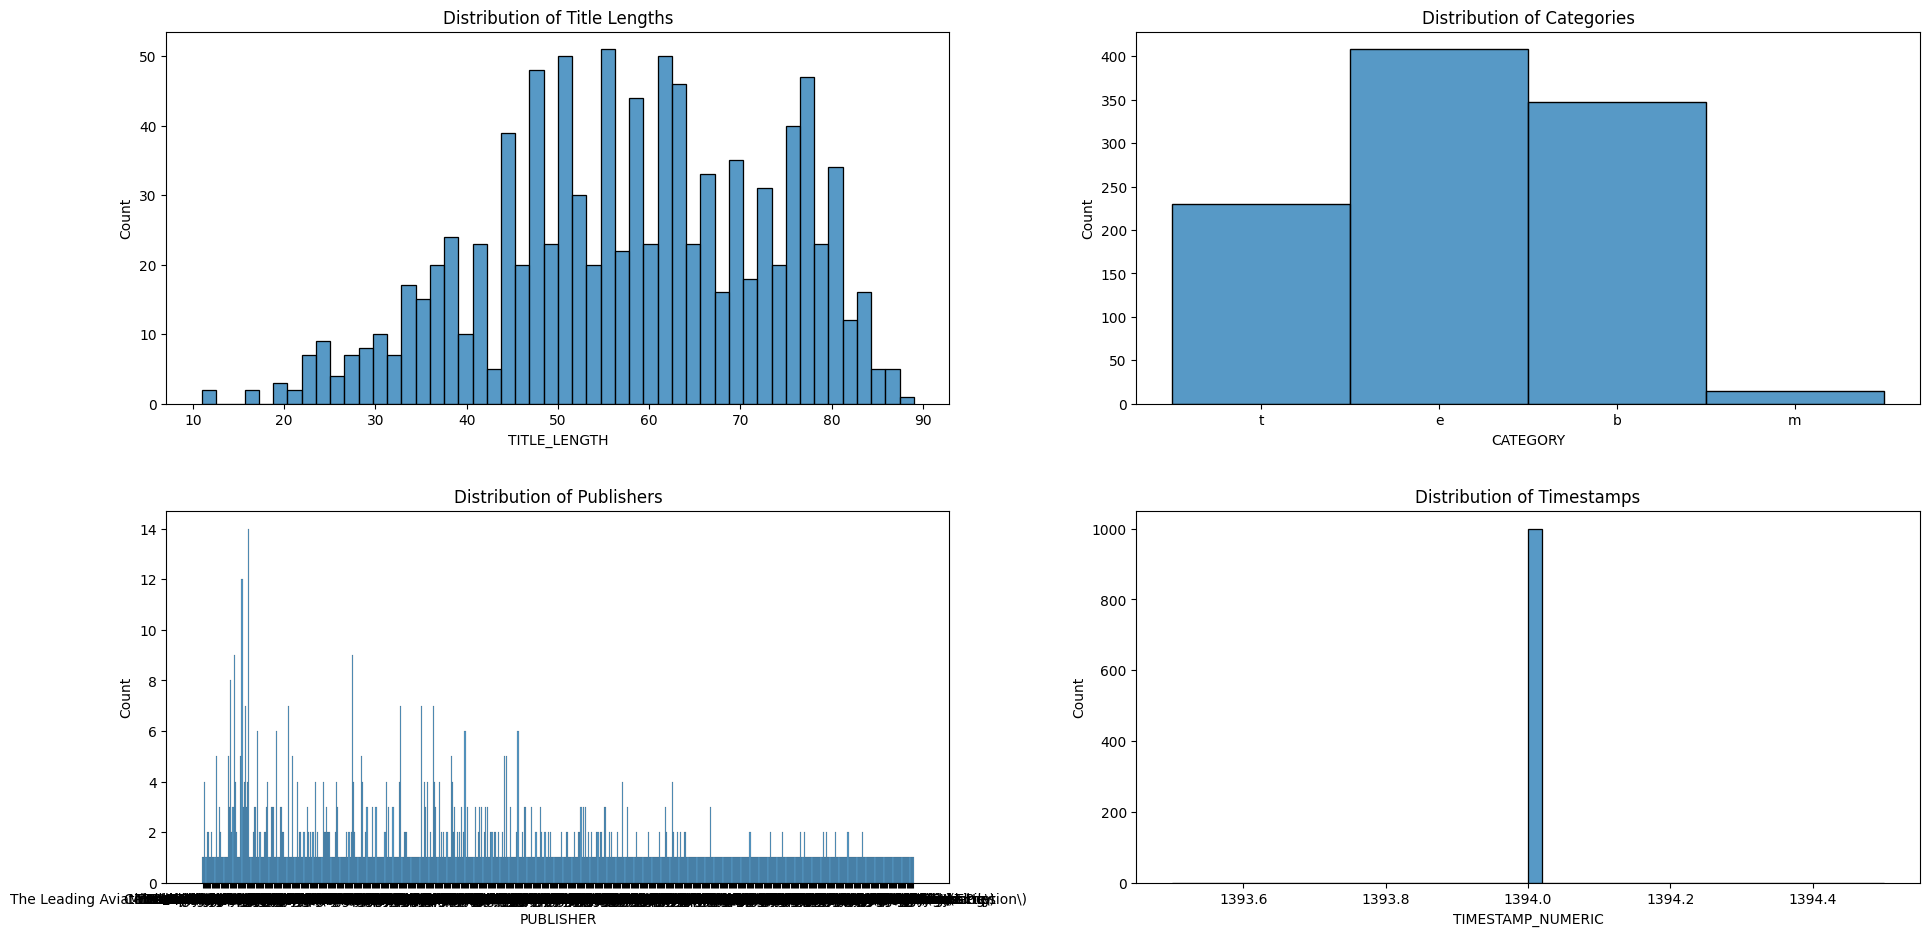

In [ ]:
# Analysis on numeric variables


# Suppress specific warnings about missing glyphs
warnings.filterwarnings("ignore", message="Glyph .* missing from font(s)")

# Sample the data to speed up plotting
sample_size = min(1000, len(df))  # Ensure sample size does not exceed population size
sampled_df = df.sample(n=sample_size, random_state=42)  # Adjust the sample size as needed

# Calculate the length of each title
sampled_df['TITLE_LENGTH'] = sampled_df['TITLE'].apply(len)

# Convert TIMESTAMP to numeric values (Unix timestamp)
sampled_df['TIMESTAMP'] = pd.to_datetime(sampled_df['TIMESTAMP'], errors='coerce')
sampled_df['TIMESTAMP_NUMERIC'] = sampled_df['TIMESTAMP'].astype('int64') // 10**9

# Example with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # Adjusted figure size

# Plotting different columns
# Distribution of Title Lengths
sns.histplot(ax=axes[0, 0], data=sampled_df, x="TITLE_LENGTH", bins=50)
axes[0, 0].set_title('Distribution of Title Lengths')

# Distribution of Categories
sns.histplot(ax=axes[0, 1], data=sampled_df, x="CATEGORY")
axes[0, 1].set_title('Distribution of Categories')

# Distribution of Publishers
sns.histplot(ax=axes[1, 0], data=sampled_df, x="PUBLISHER")
axes[1, 0].set_title('Distribution of Publishers')

# Distribution of Timestamps
sns.histplot(ax=axes[1, 1], data=sampled_df, x="TIMESTAMP_NUMERIC", bins=50)
axes[1, 1].set_title('Distribution of Timestamps')

# Adjust the layout
plt.tight_layout(pad=3.0)  # Adjusted padding

# Show the plot
plt.show()

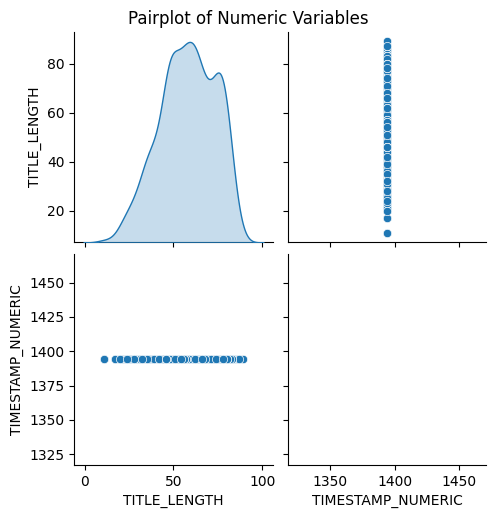

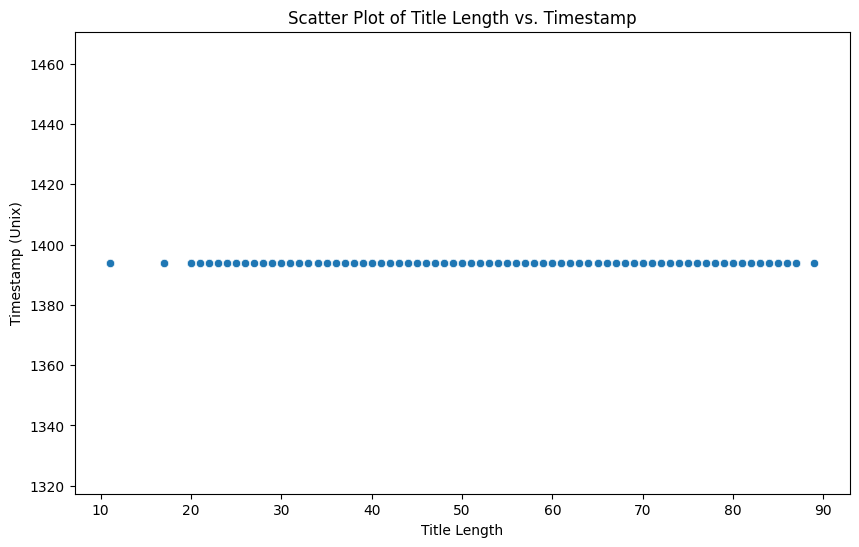

In [ ]:
# Multivariate Analysis



# Sample the data to speed up plotting
sample_size = min(1000, len(df))  # Ensure sample size does not exceed population size
sampled_df = df.sample(n=sample_size, random_state=42)  # Adjust the sample size as needed

# Calculate the length of each title
sampled_df['TITLE_LENGTH'] = sampled_df['TITLE'].apply(len)

# Convert TIMESTAMP to numeric values (Unix timestamp)
sampled_df['TIMESTAMP'] = pd.to_datetime(sampled_df['TIMESTAMP'], errors='coerce')
sampled_df['TIMESTAMP_NUMERIC'] = sampled_df['TIMESTAMP'].astype('int64') // 10**9

# Pairplot to visualize pairwise relationships
sns.pairplot(sampled_df[['TITLE_LENGTH', 'TIMESTAMP_NUMERIC']], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


# Scatter plot to visualize relationship between TITLE_LENGTH and TIMESTAMP_NUMERIC
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='TITLE_LENGTH', y='TIMESTAMP_NUMERIC')
plt.title('Scatter Plot of Title Length vs. Timestamp')
plt.xlabel('Title Length')
plt.ylabel('Timestamp (Unix)')
plt.show()

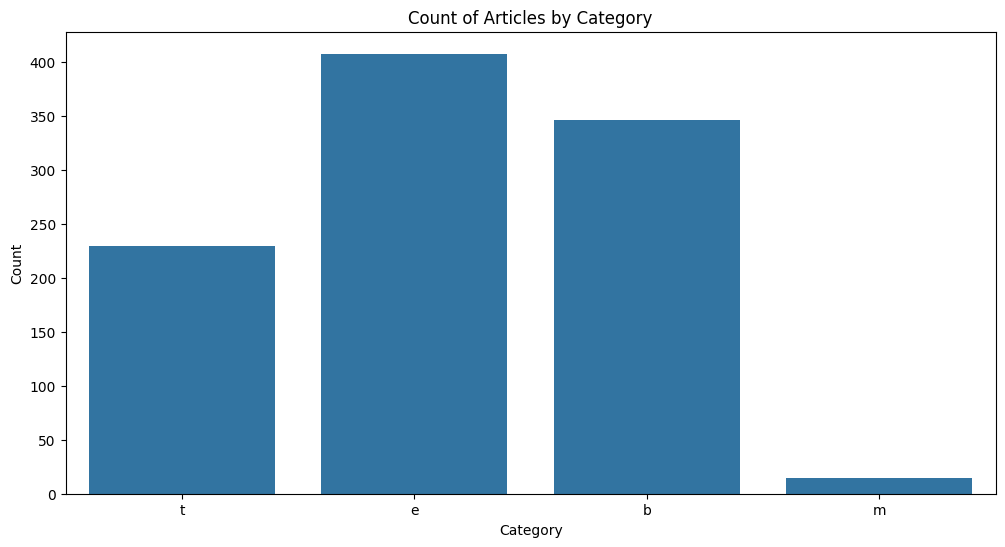

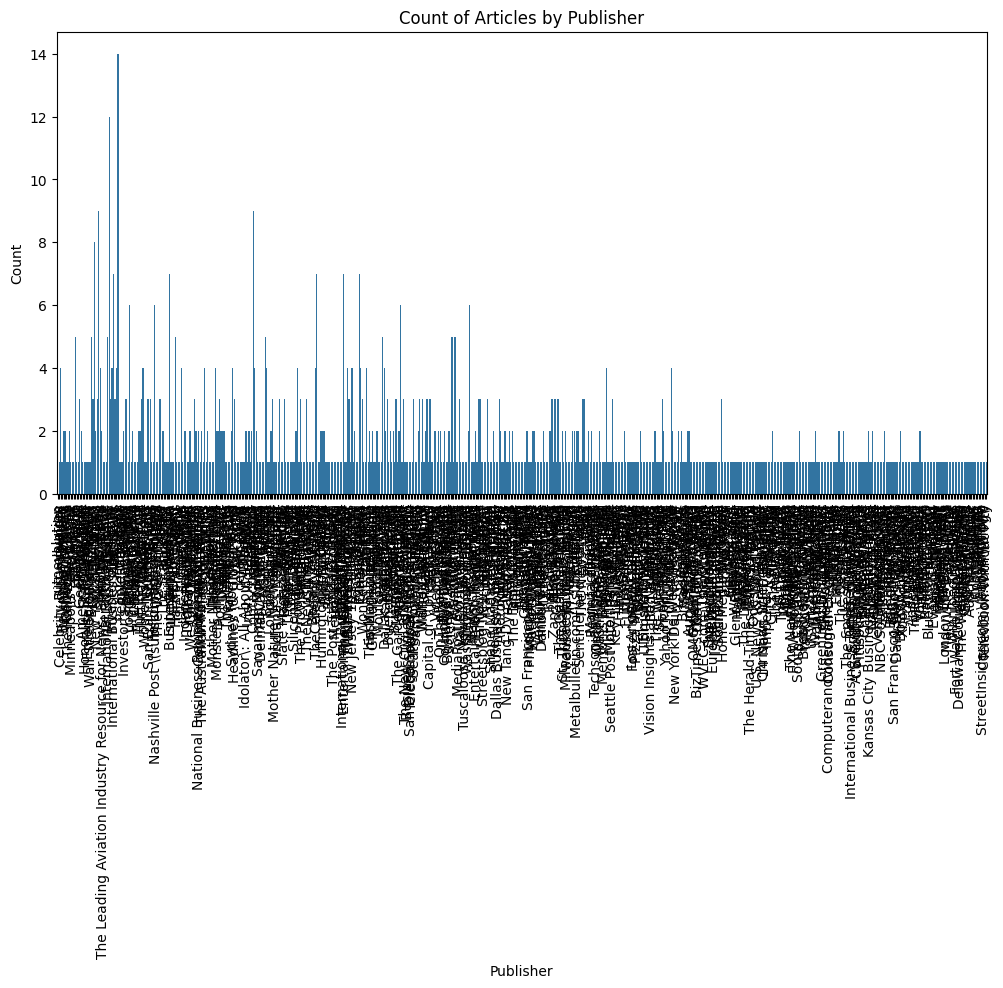

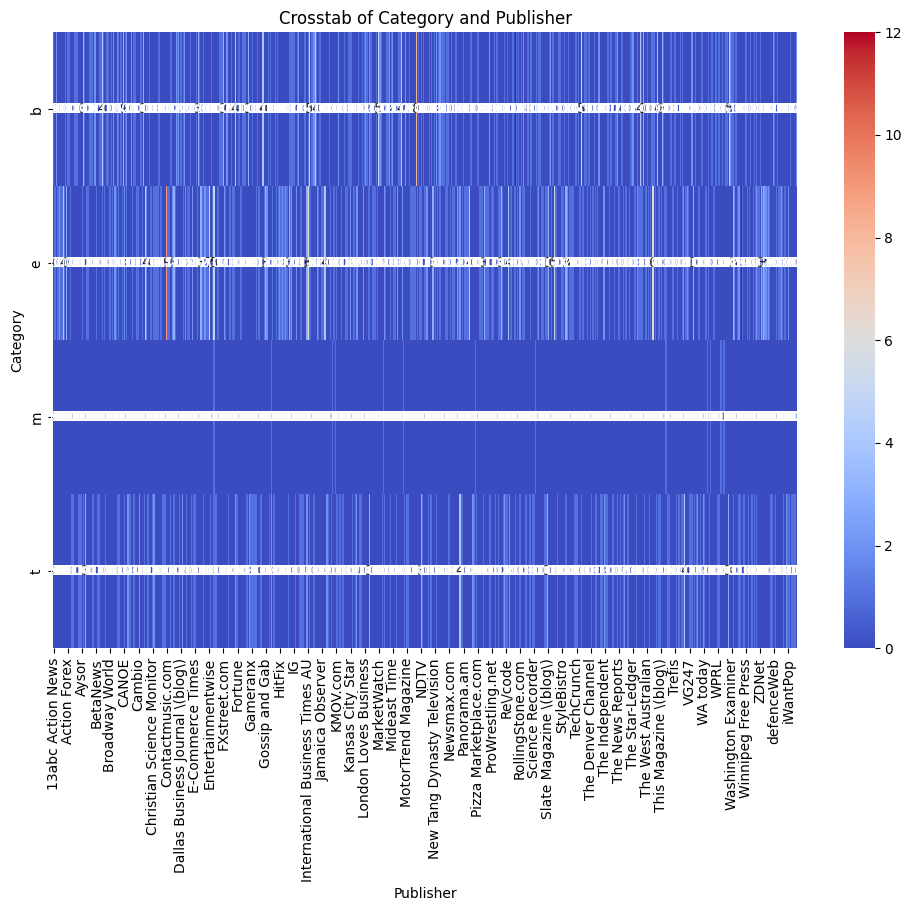

In [ ]:
# Categorical-Categorical Analysis

# Sample the data to speed up plotting
sample_size = min(1000, len(df))  # Ensure sample size does not exceed population size
sampled_df = df.sample(n=sample_size, random_state=42)  # Adjust the sample size as needed

# Count plot to visualize the count of categories
plt.figure(figsize=(12, 6))
sns.countplot(data=sampled_df, x='CATEGORY')
plt.title('Count of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Count plot to visualize the count of publishers
plt.figure(figsize=(12, 6))
sns.countplot(data=sampled_df, x='PUBLISHER')
plt.title('Count of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Crosstab to show the relationship between CATEGORY and PUBLISHER
crosstab = pd.crosstab(sampled_df['CATEGORY'], sampled_df['PUBLISHER'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Crosstab of Category and Publisher')
plt.xlabel('Publisher')
plt.ylabel('Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

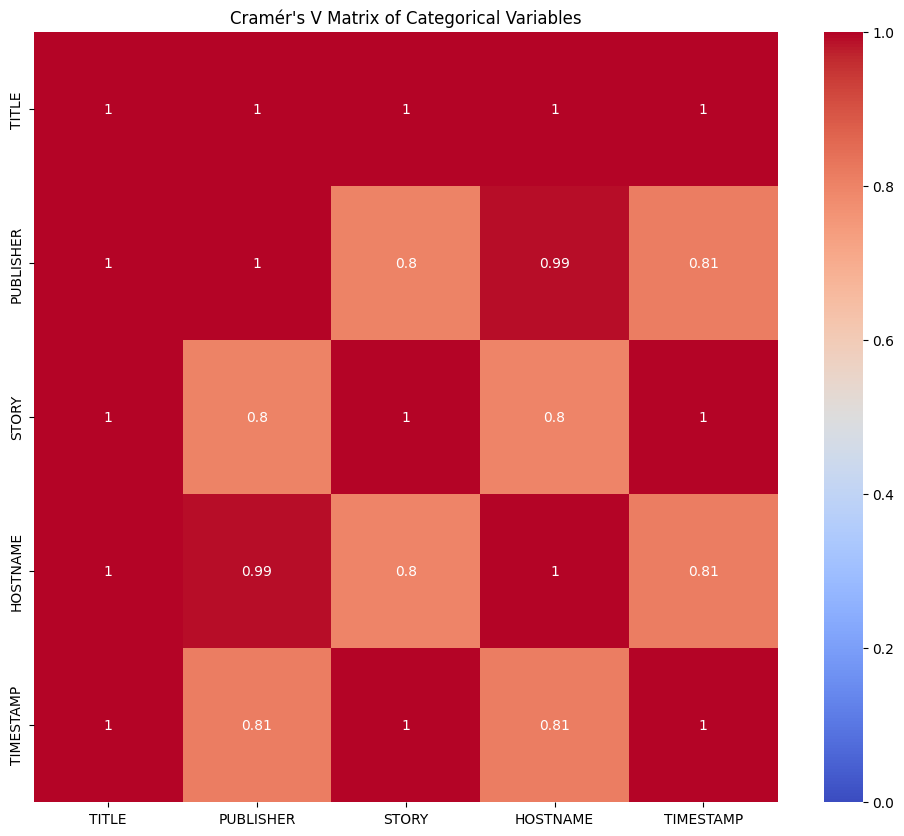

In [ ]:


# Suppress specific warnings about missing glyphs
warnings.filterwarnings("ignore", message="Glyph .* missing from font(s)")

# Sample the data to speed up analysis
sample_size = min(1000, len(df))  # Ensure sample size does not exceed population size
sampled_df = df.sample(n=sample_size, random_state=42)  # Adjust the sample size as needed

# Convert TIMESTAMP to datetime
sampled_df['TIMESTAMP'] = pd.to_datetime(sampled_df['TIMESTAMP'], errors='coerce')

# Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# List of categorical columns
categorical_columns = ['TITLE', 'PUBLISHER', 'STORY', 'HOSTNAME', 'TIMESTAMP']

# Initialize a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(sampled_df[col1], sampled_df[col2])

# Convert the matrix to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap of Cramér's V matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Matrix of Categorical Variables")
plt.show()

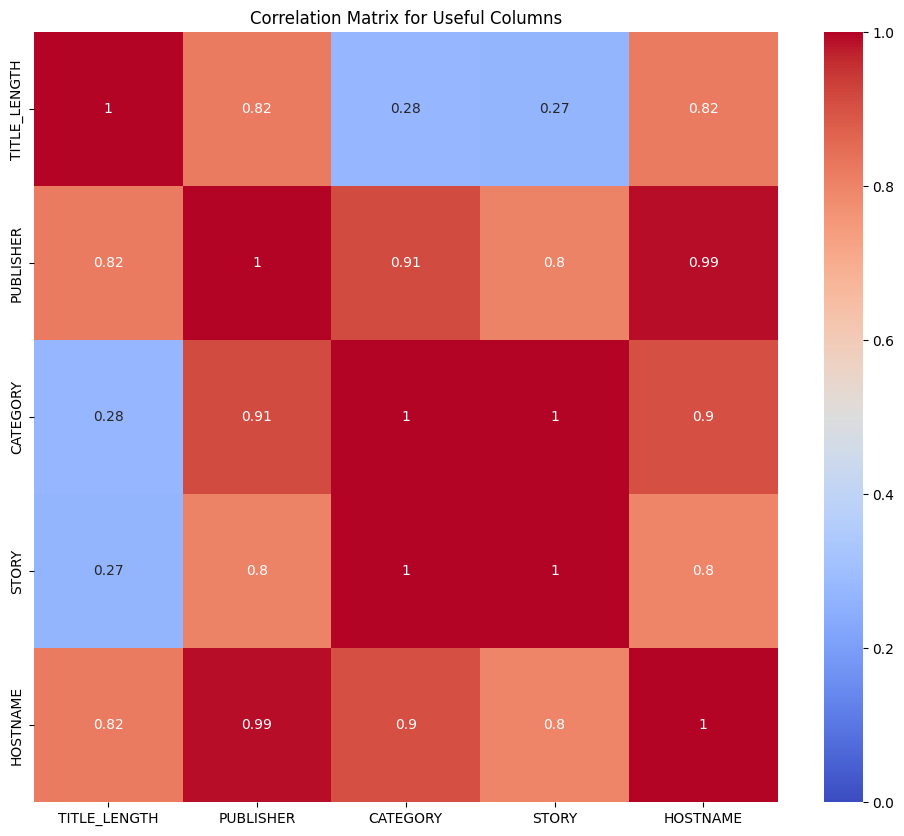

In [ ]:

# Sample the data to speed up analysis
sample_size = min(1000, len(df))  # Ensure sample size does not exceed population size
sampled_df = df.sample(n=sample_size, random_state=42)  # Adjust the sample size as needed

# Calculate the length of each title
sampled_df['TITLE_LENGTH'] = sampled_df['TITLE'].apply(len)

# Convert TIMESTAMP to numeric values (Unix timestamp)
sampled_df['TIMESTAMP'] = pd.to_datetime(sampled_df['TIMESTAMP'], errors='coerce')
# sampled_df['TIMESTAMP_NUMERIC'] = sampled_df['TIMESTAMP'].astype('int64') // 10**9

# Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# List of useful columns
useful_columns = ['TITLE_LENGTH', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME']

# Initialize a DataFrame to store correlation values
correlation_matrix = pd.DataFrame(index=useful_columns, columns=useful_columns)

# Calculate Pearson correlation for numerical-numerical pairs
numerical_columns = ['TITLE_LENGTH']
for col1 in numerical_columns:
    for col2 in numerical_columns:
        correlation_matrix.loc[col1, col2] = sampled_df[[col1, col2]].corr().iloc[0, 1]

# Calculate Cramér's V for categorical-categorical pairs
categorical_columns = ['PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME']
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(sampled_df[col1], sampled_df[col2])

# Calculate correlation for numerical-categorical pairs using Cramér's V
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        correlation_matrix.loc[num_col, cat_col] = cramers_v(sampled_df[num_col], sampled_df[cat_col])
        correlation_matrix.loc[cat_col, num_col] = correlation_matrix.loc[num_col, cat_col]

# Convert the matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix for Useful Columns')
plt.show()

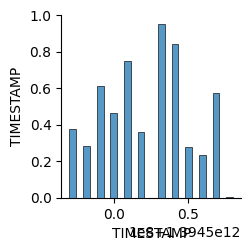

In [ ]:
sns.pairplot(data = df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         500 non-null    int64  
 1   TITLE      500 non-null    object 
 2   URL        500 non-null    object 
 3   PUBLISHER  500 non-null    object 
 4   CATEGORY   500 non-null    object 
 5   STORY      500 non-null    object 
 6   HOSTNAME   500 non-null    object 
 7   TIMESTAMP  500 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 31.4+ KB
None

First 5 Rows of the Dataset:
   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                

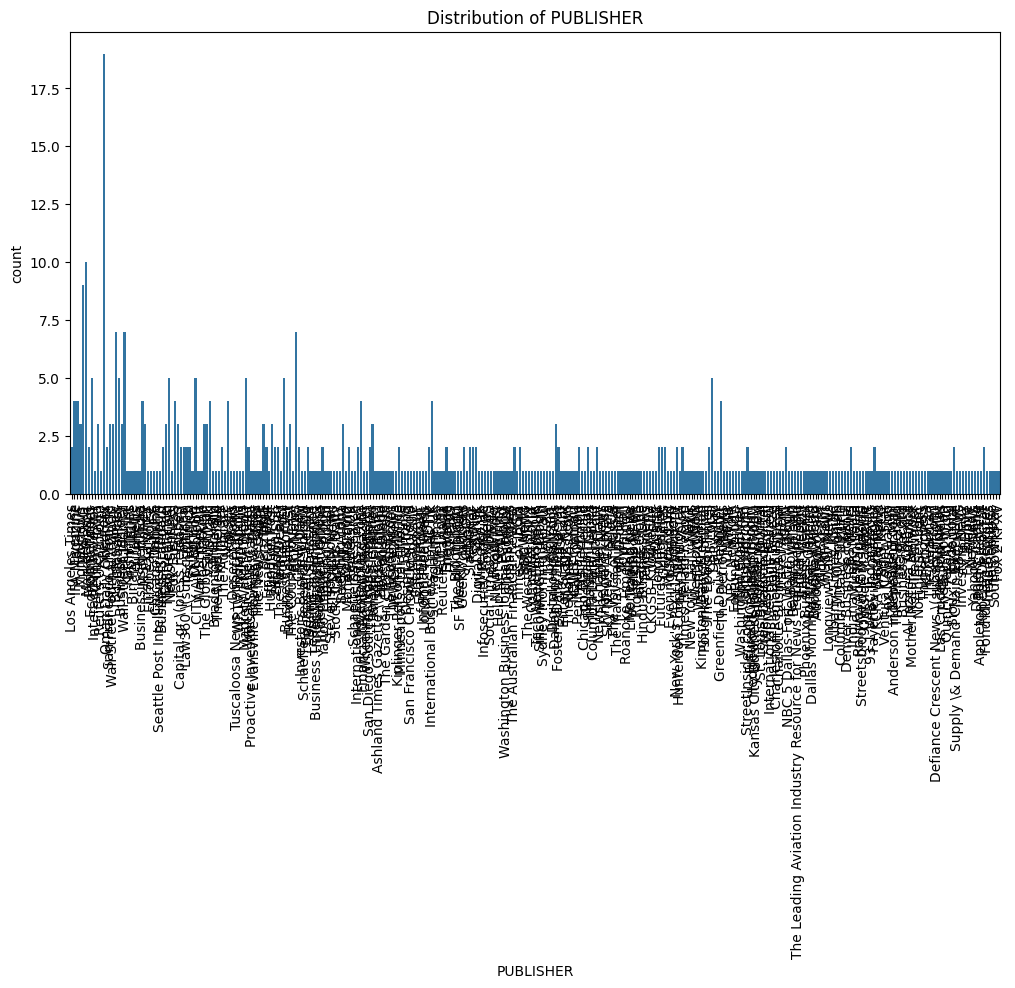

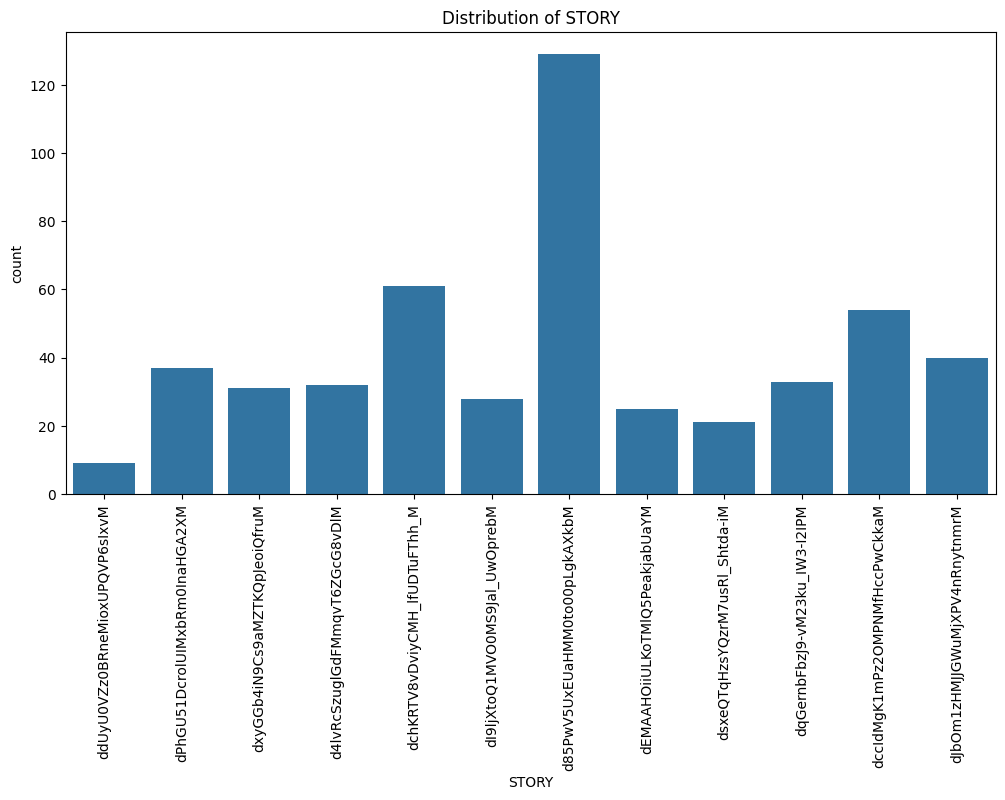

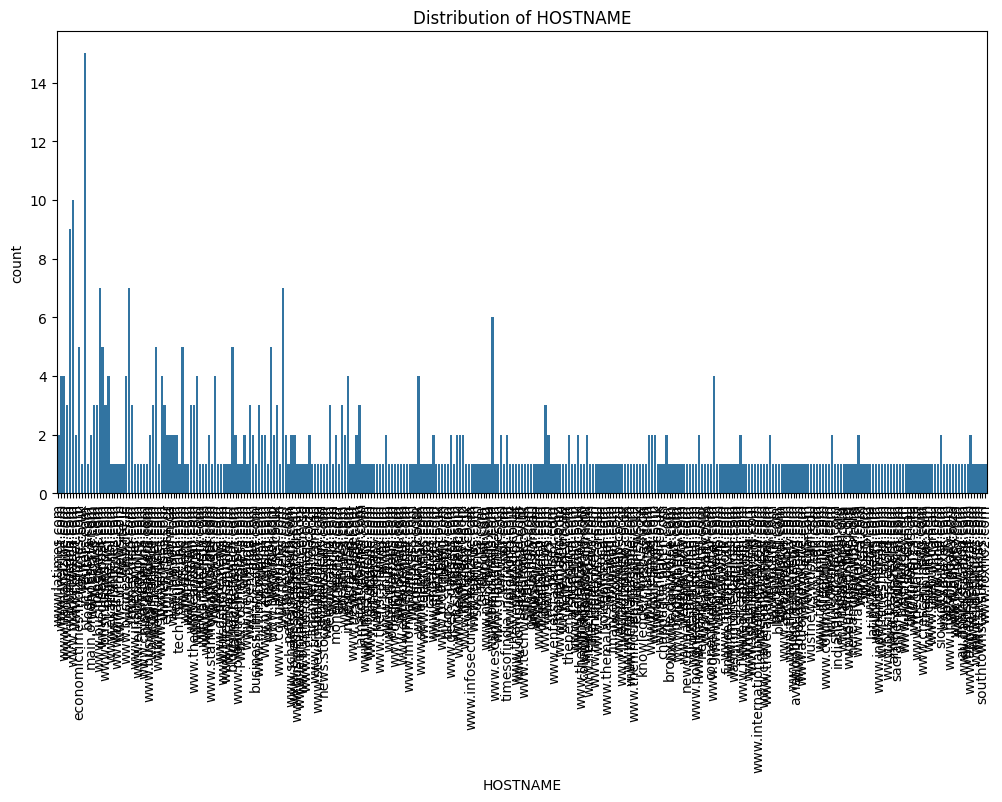

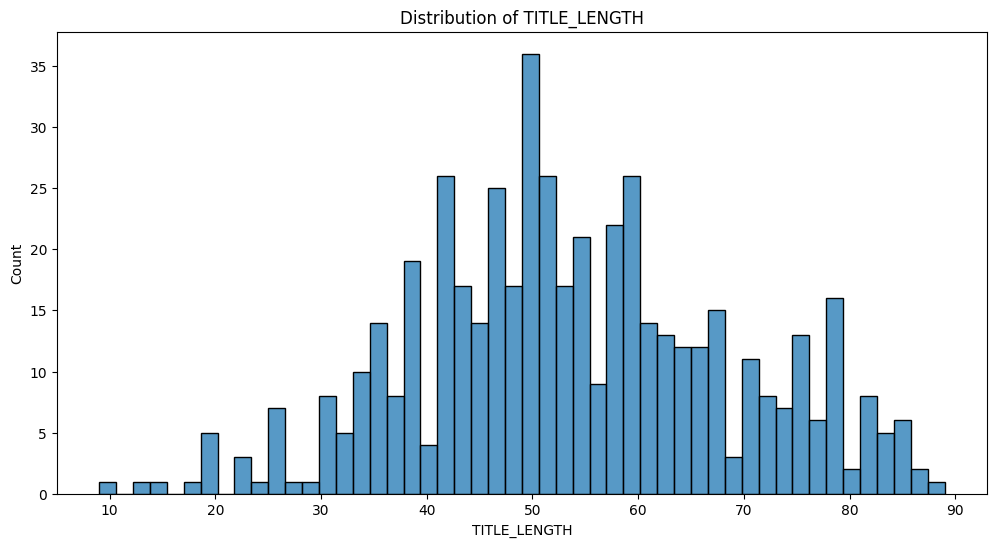

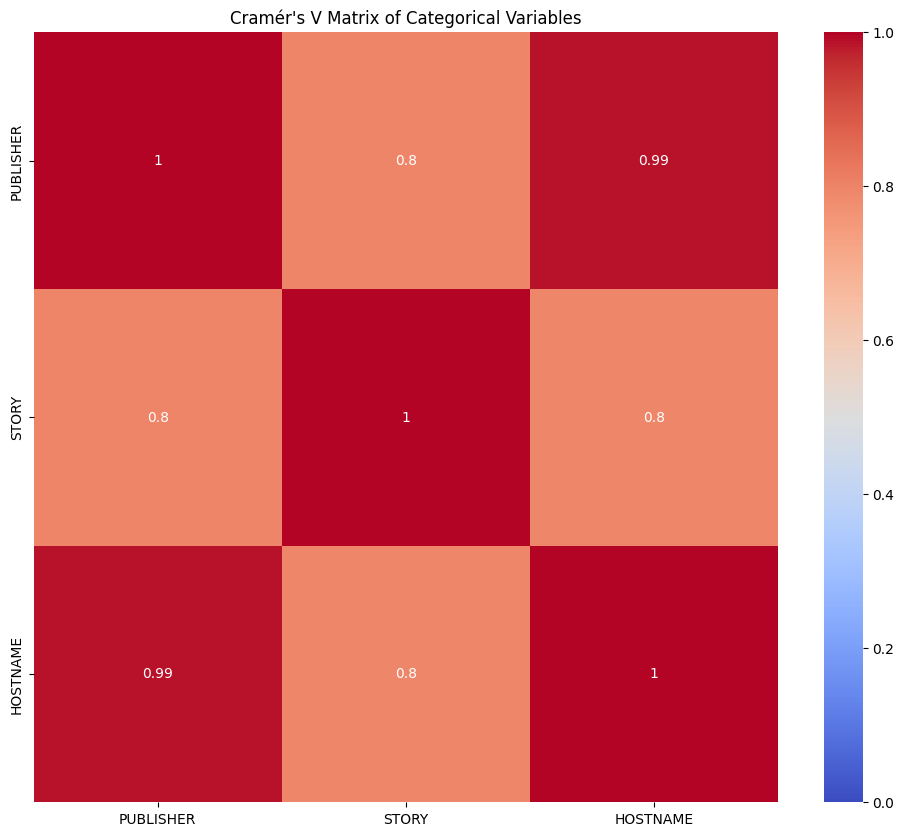

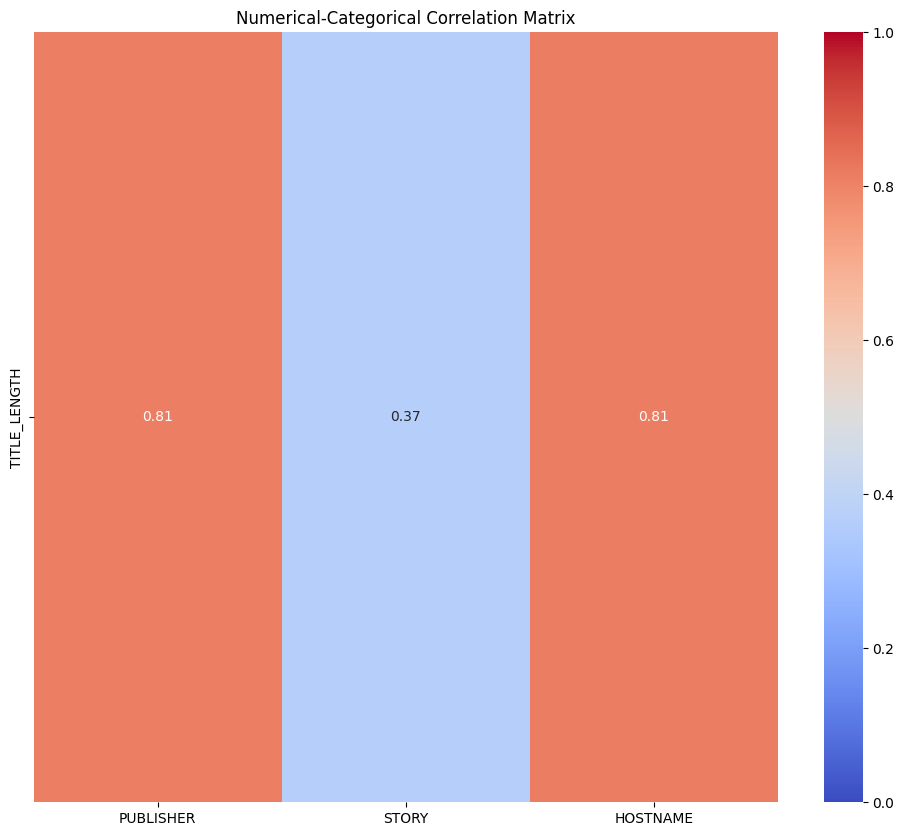


First 5 Rows of the Preprocessed Dataset:
   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL CATEGORY  \
0  http://www.latimes.com/business/money/la-fi-mo...        b   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...        b   
2  http://www.ifamagazine.com/news/us-open-stocks...        b   
3  http://www.ifamagazine.com/news/fed-risks-fall...        b   
4  http://www.moneynews.com/Economy/federal-reser...        b   

                TIMESTAMP  TITLE_LENGTH  TIMESTAMP_NUMERIC  \
0 1970-01-01 00:23:14.470            68               1394   
1 1970-01-01 00:23:14.470            66               1394   
2 1970-01-01 00:23:

In [ ]:

# Suppress specific warnings about missing glyphs
warnings.filterwarnings("ignore", message="Glyph .* missing from font(s)")

# Task 1: Load the dataset and select the first 5000 rows
file_path = '/content/uci-news-aggregator.csv'
df = pd.read_csv(file_path, encoding='latin1')  # Specify the encoding
df = df.head(500)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Exploratory Data Analysis (EDA)

# 1. Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# 2. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Distribution of Categorical Variables
categorical_columns = ['PUBLISHER', 'STORY', 'HOSTNAME']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# 4. Distribution of Numerical Variables
df['TITLE_LENGTH'] = df['TITLE'].apply(len)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], errors='coerce')
df['TIMESTAMP_NUMERIC'] = df['TIMESTAMP'].astype('int64') // 10**9

numerical_columns = ['TITLE_LENGTH']
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. Correlation Analysis
# Numerical-Numerical Correlation
# Categorical-Categorical Correlation using Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Matrix of Categorical Variables")
plt.show()

# Numerical-Categorical Correlation using Cramér's V
numerical_categorical_corr = pd.DataFrame(index=numerical_columns, columns=categorical_columns)
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        numerical_categorical_corr.loc[num_col, cat_col] = cramers_v(df[num_col], df[cat_col])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_categorical_corr.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Numerical-Categorical Correlation Matrix')
plt.show()

# Preprocessing Steps

# 1. Handling Missing Values
df = df.dropna()  # Drop rows with missing values

# 2. Encoding Categorical Variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first 5 rows of the preprocessed dataset
print("\nFirst 5 Rows of the Preprocessed Dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5000 non-null   int64  
 1   TITLE      5000 non-null   object 
 2   URL        5000 non-null   object 
 3   PUBLISHER  4999 non-null   object 
 4   CATEGORY   5000 non-null   object 
 5   STORY      5000 non-null   object 
 6   HOSTNAME   5000 non-null   object 
 7   TIMESTAMP  5000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB
None

First 5 Rows of the Dataset:
   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

             

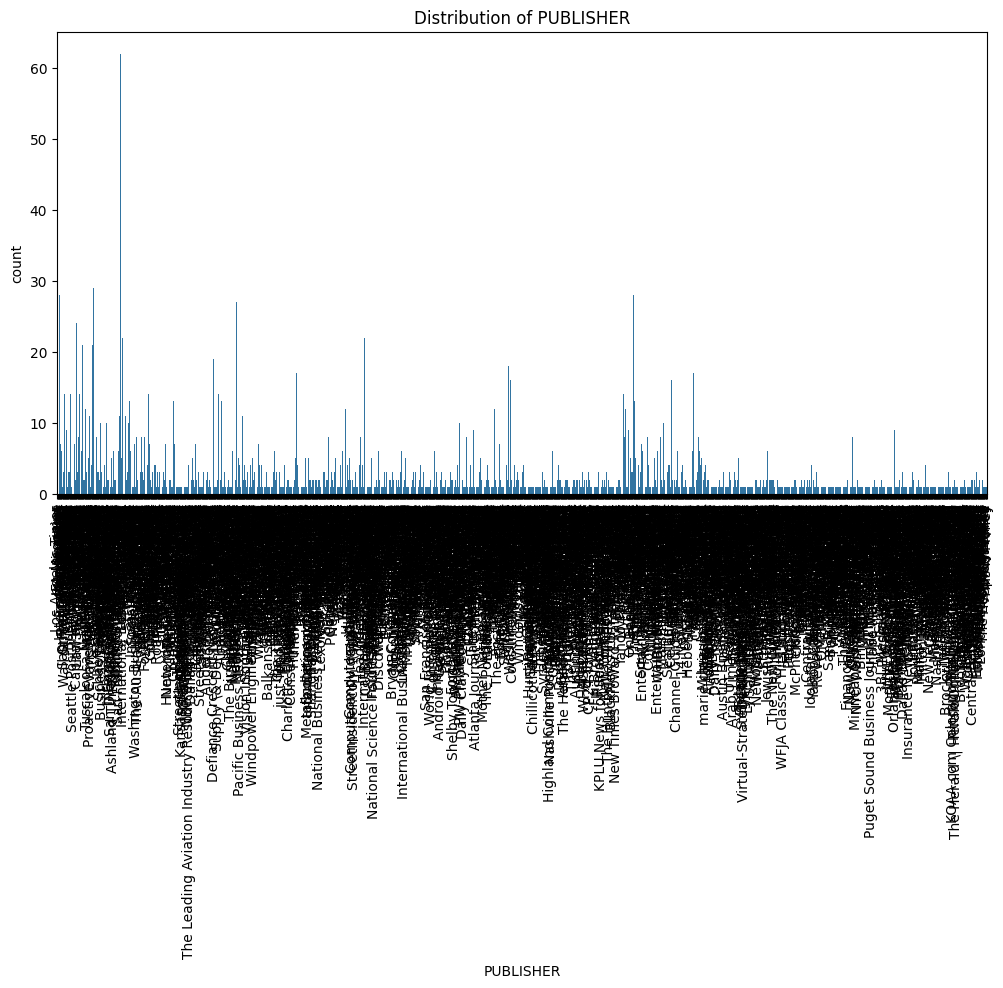

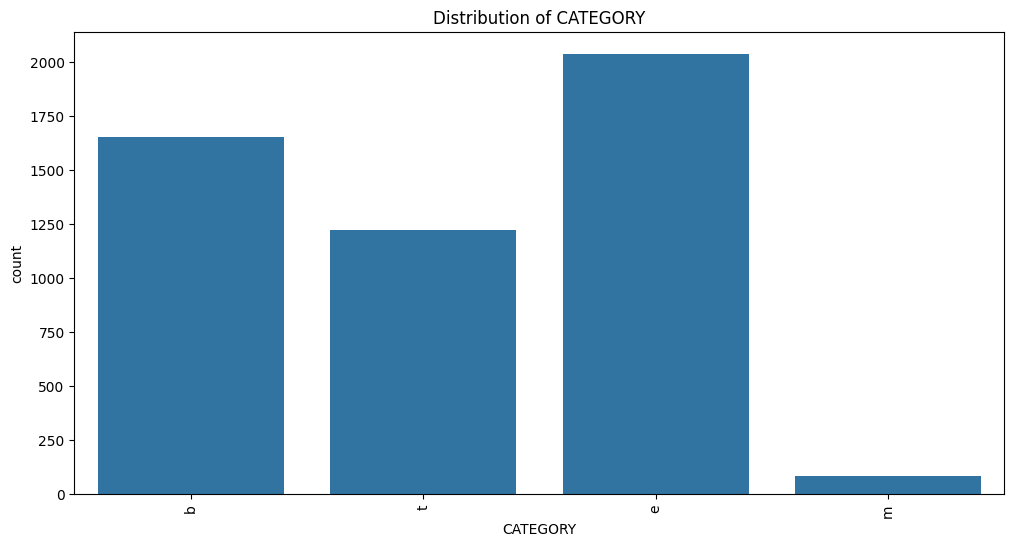

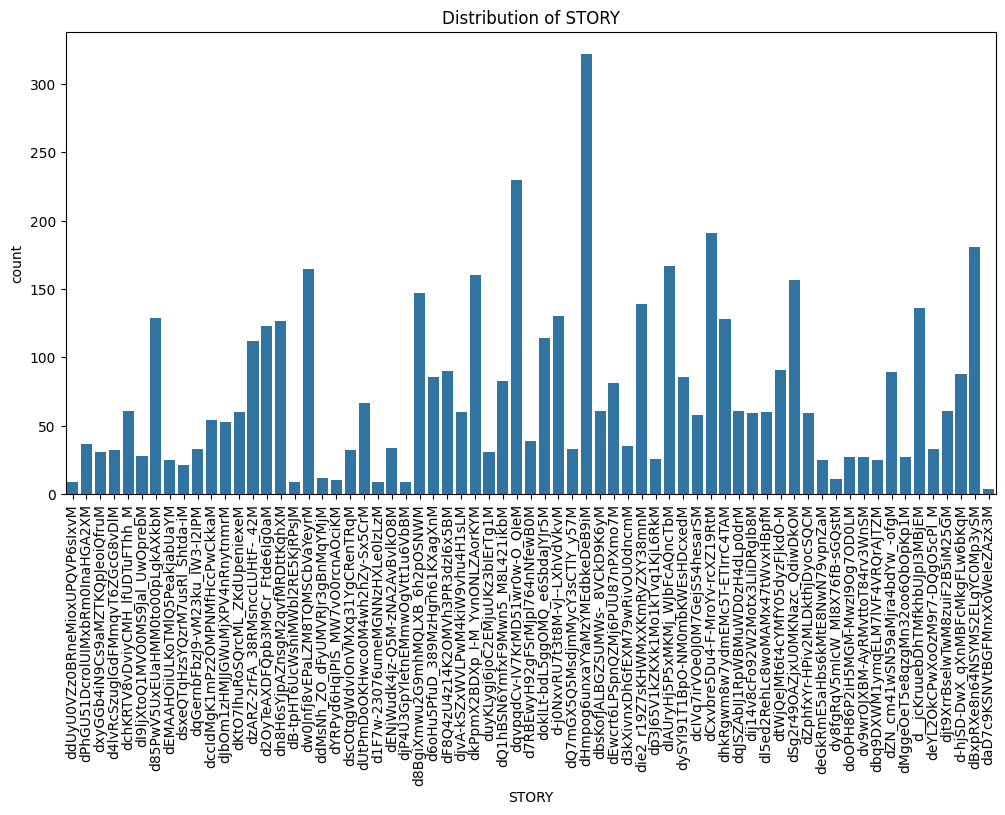

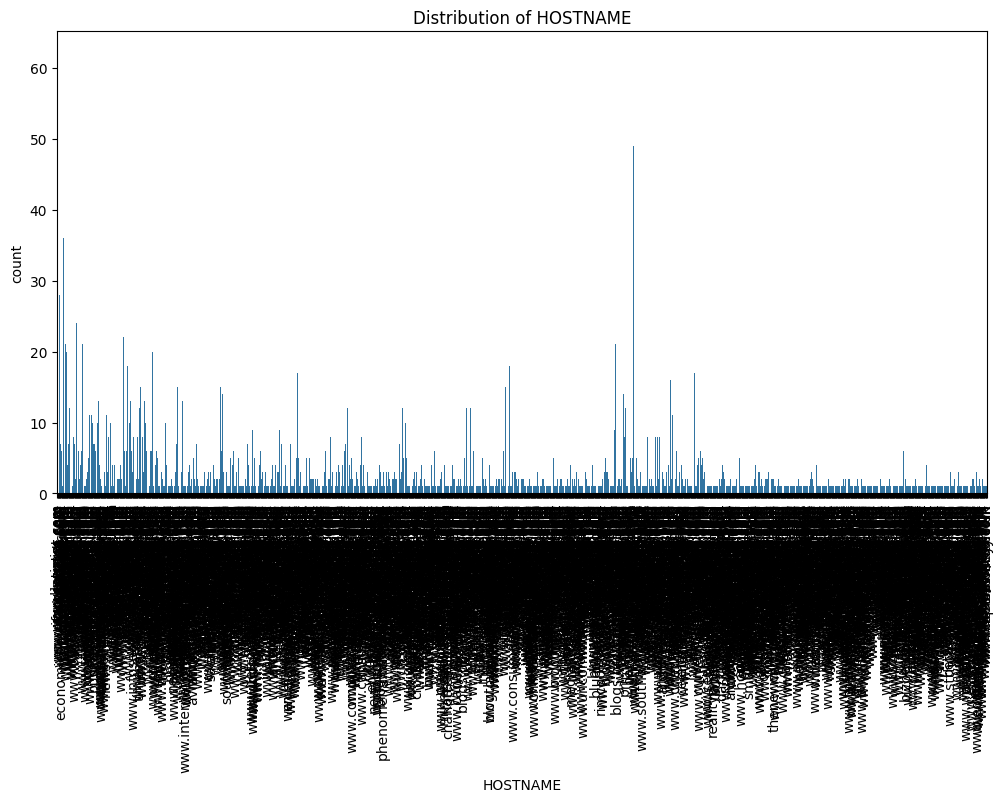

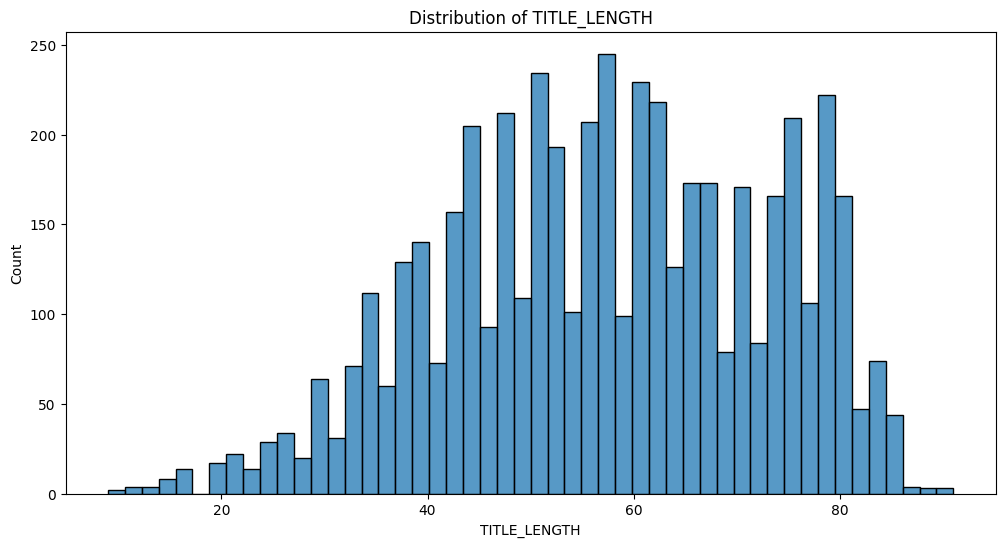

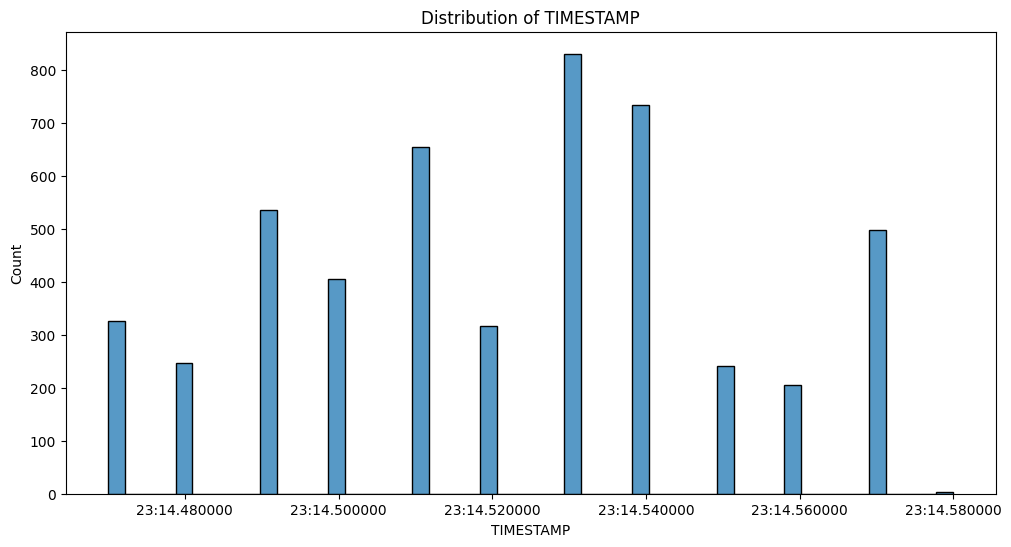

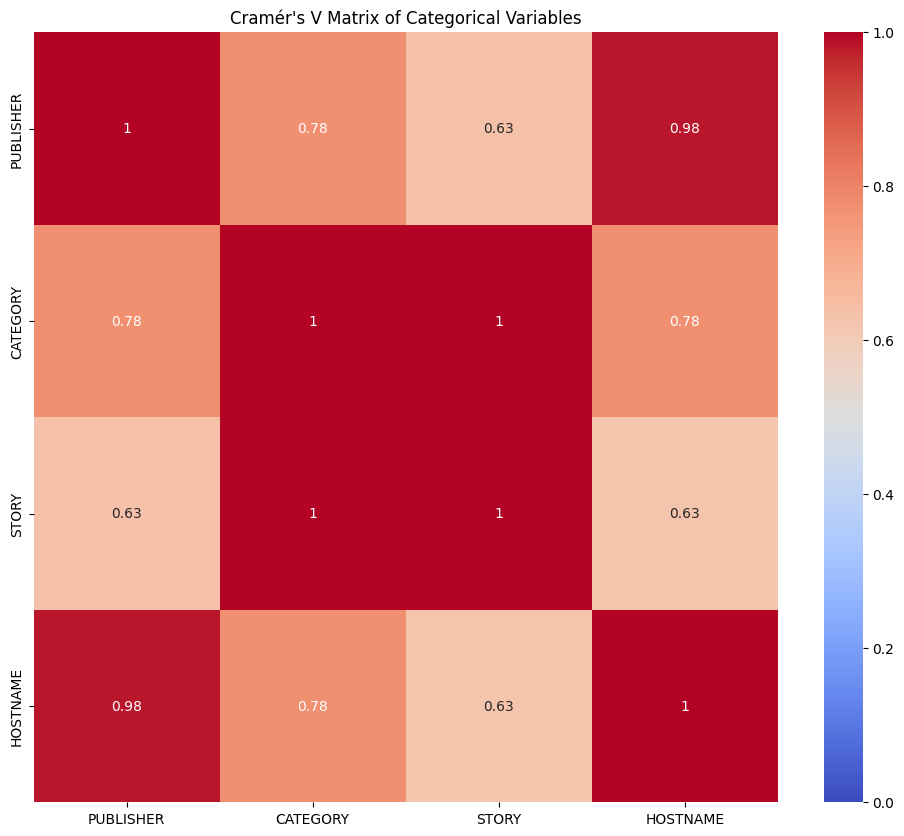

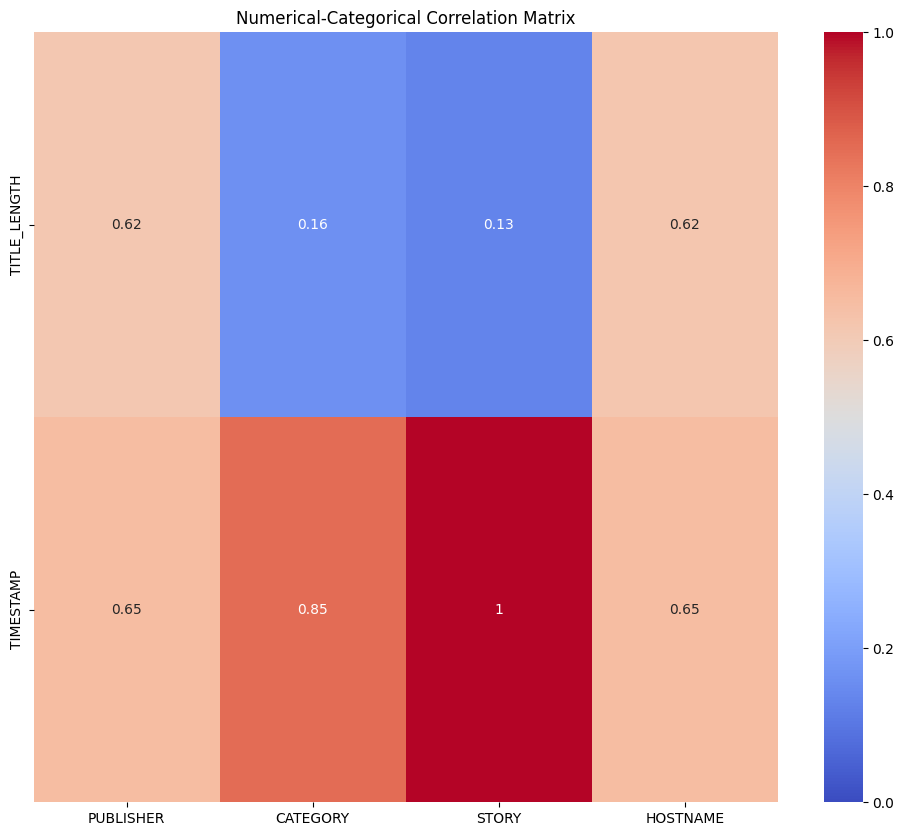


First 5 Rows of the Preprocessed Dataset:
   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL               TIMESTAMP  \
0  http://www.latimes.com/business/money/la-fi-mo... 1970-01-01 00:23:14.470   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O... 1970-01-01 00:23:14.470   
2  http://www.ifamagazine.com/news/us-open-stocks... 1970-01-01 00:23:14.470   
3  http://www.ifamagazine.com/news/fed-risks-fall... 1970-01-01 00:23:14.470   
4  http://www.moneynews.com/Economy/federal-reser... 1970-01-01 00:23:14.470   

   TITLE_LENGTH  PUBLISHER_10TV  PUBLISHER_13abc Action News  \
0            68           False                    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

# Suppress specific warnings about missing glyphs
warnings.filterwarnings("ignore", message="Glyph .* missing from font(s)")

# Task 1: Load the dataset and select the first 5000 rows
file_path = '/content/uci-news-aggregator.csv'
df = pd.read_csv(file_path, encoding='latin1')  # Specify the encoding
df = df.head(5000)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Exploratory Data Analysis (EDA)

# 1. Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# 2. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Distribution of Categorical Variables
categorical_columns = ['PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# 4. Distribution of Numerical Variables
df['TITLE_LENGTH'] = df['TITLE'].apply(len)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], errors='coerce')
# df['TIMESTAMP_NUMERIC'] = df['TIMESTAMP'].astype('int64') // 10**9

numerical_columns = ['TITLE_LENGTH', 'TIMESTAMP']
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. Correlation Analysis

# Categorical-Categorical Correlation using Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Matrix of Categorical Variables")
plt.show()

# Numerical-Categorical Correlation using Cramér's V
numerical_categorical_corr = pd.DataFrame(index=numerical_columns, columns=categorical_columns)
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        numerical_categorical_corr.loc[num_col, cat_col] = cramers_v(df[num_col], df[cat_col])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_categorical_corr.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Numerical-Categorical Correlation Matrix')
plt.show()

# Preprocessing Steps

# 1. Handling Missing Values
df = df.dropna()  # Drop rows with missing values

# 2. Encoding Categorical Variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first 5 rows of the preprocessed dataset
print("\nFirst 5 Rows of the Preprocessed Dataset:")
print(df.head())

In [ ]:
df

,ID,TITLE,URL,TIMESTAMP,TITLE_LENGTH,PUBLISHER_10TV,PUBLISHER_13abc Action News,PUBLISHER_14 News WFIE Evansville,PUBLISHER_2 Minute Medicine,PUBLISHER_24\/7 Wall St.,...,HOSTNAME_www.yourmoney.com,HOSTNAME_www.yourtango.com,HOSTNAME_www.yourtv.com.au,HOSTNAME_www.zacks.com,HOSTNAME_www.zdnet.com,HOSTNAME_www.zeibiz.com,HOSTNAME_www.zimbio.com,HOSTNAME_za.news.yahoo.com,HOSTNAME_zeenews.india.com,HOSTNAME_zolmax.com
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,1970-01-01 00:23:14.470,68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,1970-01-01 00:23:14.470,66,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,1970-01-01 00:23:14.470,69,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,1970-01-01 00:23:14.470,58,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,1970-01-01 00:23:14.470,50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Soft touch FX regulation falls under harsh glare,http://www.dailytimes.com.pk/business/09-Mar-2...,1970-01-01 00:23:14.570,48,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,4997,SAC Capital to rename as Point72 Asset Managem...,http://www.newstimes.com/news/article/SAC-Capi...,1970-01-01 00:23:14.580,60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,4998,SAC Capital takes new name after insider scandal,http://digitaljournal.com/business/business/sa...,1970-01-01 00:23:14.580,48,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,4999,Steve Cohen renames fund Point72 Asset Management,http://nypost.com/2014/03/11/steve-cohen-renam...,1970-01-01 00:23:14.580,49,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Task 2 : Implementing Parsing Algorithms

1. Display the POS tagging on the first 2 rows of ‘title’

In [ ]:
# Step 1: Display POS Tagging
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Display POS tagging on the first 2 rows of 'title'
titles = df['TITLE'].head(2)
for title in titles:
    doc = nlp(title)
    print(f"Title: {title}")
    for token in doc:
        print(f"{token.text}: {token.pos_}")
    print("\n")

Title: Fed official says weak data caused by weather, should not slow taper
Fed: PROPN
official: NOUN
says: VERB
weak: ADJ
data: NOUN
caused: VERB
by: ADP
weather: NOUN
,: PUNCT
should: AUX
not: PART
slow: VERB
taper: NOUN


Title: Fed's Charles Plosser sees high bar for change in pace of tapering
Fed: PROPN
's: PART
Charles: PROPN
Plosser: PROPN
sees: VERB
high: ADJ
bar: NOUN
for: ADP
change: NOUN
in: ADP
pace: NOUN
of: ADP
tapering: VERB




 2. Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency parser looks good and should visually understandable.


In [ ]:
# Step 2: Plot Dependency Parser
import random
from spacy import displacy

# Select two random sentences with at least 10 words
long_sentences = [title for title in df['TITLE'] if len(title.split()) >= 10]
random_sentences = random.sample(long_sentences, 2)
print(random_sentences)
# Plot dependency parser for the selected sentences
for sentence in random_sentences:
    print('sentence : '+sentence)
    doc = nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True)

['JC Penney Company Upgraded to â\x80\x9cBuyâ\x80\x9d at Citigroup Inc. (JCP)', "Rebel group manoeuvres over Libya's oil could lead to renewed civil conflict"]
sentence : JC Penney Company Upgraded to âBuyâ at Citigroup Inc. (JCP)


sentence : Rebel group manoeuvres over Libya's oil could lead to renewed civil conflict


3. Plot the Statistical parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that Statistical parser looks good and should visually understandable.



In [ ]:
# pip install svgling

3. Plot the Statistical parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that Statistical parser looks good and should visually understandable.

In [ ]:

import nltk
from nltk import PCFG
from nltk.parse import pchart
from collections import Counter
from IPython.display import display

# Select two random sentences with at least 10 words
long_sentences = [title for title in df['TITLE'] if len(title.split()) >= 10]
random_sentences = random.sample(long_sentences, 2)

# Tokenize the sentences and count the occurrences of each word
tokens = [word for sentence in random_sentences for word in sentence.split()]
word_counts = Counter(tokens)

# Define a function to create a PCFG dynamically
def create_pcfg(word_counts):
    # Define the base structure of the grammar
    grammar = """
    S -> NP VP [1.0]
    VP -> V NP [0.5] | V NP PP [0.5]
    PP -> P NP [1.0]
    NP -> Det N [0.3] | Det N PP [0.3] | N [0.4]
    """

    # Add the vocabulary to the grammar
    total_words = sum(word_counts.values())
    for word, count in word_counts.items():
        probability = count / total_words
        grammar += f'V -> "{word}" [{probability}]\n'
        grammar += f'N -> "{word}" [{probability}]\n'
        grammar += f'Det -> "{word}" [{probability}]\n'
        grammar += f'P -> "{word}" [{probability}]\n'

    return PCFG.fromstring(grammar)

# Create the PCFG dynamically
pcfg_grammar = create_pcfg(word_counts)

# Initialize the parser
parser = pchart.InsideChartParser(pcfg_grammar)
print(random_sentences)


['The Voice: Coaches Get Choosy as Blind Auditions Near Their End', 'Cure your True Detective hangover with these Rust Cohle greeting cards']


In [ ]:
# Plot statistical parser for the selected sentences using svgling
for sentence in random_sentences:
    print('sentence printing : '+sentence)
    tokens = sentence.split()
    parses = list(parser.parse(tokens))
    if parses:
        for tree in parses:
            display(tree)
    else:
        print(f"No parse tree found for: {sentence}")

sentence printing : The Voice: Coaches Get Choosy as Blind Auditions Near Their End


ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08), ProbabilisticTree('VP', [ProbabilisticTree('V', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('N', ['Auditions']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Near']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Their']) (p=0.045454545454545456), ProbabilisticTree('N', ['End']) (p=0.045454545454545456)]) (p=0.0006198347107438

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08), ProbabilisticTree('VP', [ProbabilisticTree('V', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('N', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Near']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Their']) (p=0.045454545454545456), ProbabilisticTree('N', ['End']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('N', ['Auditions']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08)]) (p=7.937914641381247e-10)]) (p=4.920195025649534e-13), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Near']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Their']) (p=0.045454545454545456), ProbabilisticTree('N', ['End']) (p=0.045454545454545

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('N', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Near']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Their']) (p=0.045454545454545456), ProbabilisticTree('N', ['End']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08)]) (p=7.937914641381247e

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('PP', [ProbabilisticTree('P', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('N', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Near']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Their']) (p=0.045454545454545456), ProbabilisticTree('N', ['End']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('N', ['Auditions']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Near']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Their']) (p=0.045454545454545456), ProbabilisticTree('N', ['End']) (p=0.045454545454545456)]) (p=0.0006198347107438

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Get']) (p=0.045454545454545456), ProbabilisticTree('N', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['as']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Blind']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07)]) (p=2.328454961471832e-08)]) (p=1.443257207523863e-11), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Near']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Their']) (p=0.045454545454545456), Probab

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('N', ['The']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('N', ['Get']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['as']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('N', ['Near']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Their']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['End']) (p=0.

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('N', ['The']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Coaches']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Get']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('N', ['as']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('N', ['Near']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Their']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['End']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.00

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('N', ['The']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('N', ['Get']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['as']) (p=0.045454545454545456), ProbabilisticTree('N', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Near']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07)]) (p=2.328454961471832e-08)]) (p=1.443257207523863e-11), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Their']) (p=0.045454545454545456), Probab

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Get']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['as']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('N', ['Near']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Their']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['End']) (p=0.

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['The']) (p=0.045454545454545456), ProbabilisticTree('N', ['Voice:']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Coaches']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Get']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Choosy']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['as']) (p=0.045454545454545456), ProbabilisticTree('N', ['Blind']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Auditions']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Near']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Their']) (p=0.045454545454545456), Probab

sentence printing : Cure your True Detective hangover with these Rust Cohle greeting cards


ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08), ProbabilisticTree('VP', [ProbabilisticTree('V', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['these']) (p=0.045454545454545456), ProbabilisticTree('N', ['Rust']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('N', ['cards']) (p=0.045454545454545456)]) (p=0.000619834

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08), ProbabilisticTree('VP', [ProbabilisticTree('V', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['these']) (p=0.045454545454545456), ProbabilisticTree('N', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('N', ['cards']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['these']) (p=0.045454545454545456), ProbabilisticTree('N', ['Rust']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08)]) (p=7.937914641381247e-10)]) (p=4.920195025649534e-13), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('N', ['cards']) (p=0.04545454

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('VP', [ProbabilisticTree('V', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['these']) (p=0.045454545454545456), ProbabilisticTree('N', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('N', ['cards']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08)]) (p=7.937914641

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('VP', [ProbabilisticTree('V', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('PP', [ProbabilisticTree('P', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['these']) (p=0.045454545454545456), ProbabilisticTree('N', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('N', ['cards']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456)]) (p=0.0006198347107438017), ProbabilisticTree('VP', [ProbabilisticTree('V', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['these']) (p=0.045454545454545456), ProbabilisticTree('N', ['Rust']) (p=0.045454545454545456)]) (p=0.0006198347107438017)]) (p=2.817430503380917e-05)]) (p=1.7463412211038743e-08), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('N', ['cards']) (p=0.045454545454545456)]) (p=0.000619834

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('N', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['with']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['these']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07)]) (p=2.328454961471832e-08)]) (p=1.443257207523863e-11), ProbabilisticTree('VP', [ProbabilisticTree('V', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Cohle']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('PP', [ProbabilisticTree('P', ['greeting']) (p=0.045454545454545456), P

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('N', ['Cure']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('VP', [ProbabilisticTree('V', ['your']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['True']) (p=0.045454545454545456), ProbabilisticTree('N', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['with']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('PP', [ProbabilisticTree('P', ['these']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('N', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['cards']

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('N', ['Cure']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('VP', [ProbabilisticTree('V', ['your']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['True']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('N', ['with']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['these']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('N', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['cards']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) 

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('N', ['Cure']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('VP', [ProbabilisticTree('V', ['your']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['True']) (p=0.045454545454545456), ProbabilisticTree('N', ['Detective']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['with']) (p=0.045454545454545456), ProbabilisticTree('N', ['these']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Cohle']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07)]) (p=2.328454961471832e-08)]) (p=1.443257207523863e-11), ProbabilisticTree('PP', [ProbabilisticTree('P', ['greeting']) (p=0.045454545454545456), P

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Detective']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('VP', [ProbabilisticTree('V', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['with']) (p=0.045454545454545456)]) (p=0.018181818181818184), ProbabilisticTree('PP', [ProbabilisticTree('P', ['these']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('N', ['Cohle']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['greeting']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['cards']

ModuleNotFoundError: No module named 'svgling'

ProbabilisticTree('S', [ProbabilisticTree('NP', [ProbabilisticTree('Det', ['Cure']) (p=0.045454545454545456), ProbabilisticTree('N', ['your']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['True']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Detective']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('VP', [ProbabilisticTree('V', ['hangover']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['with']) (p=0.045454545454545456), ProbabilisticTree('N', ['these']) (p=0.045454545454545456), ProbabilisticTree('PP', [ProbabilisticTree('P', ['Rust']) (p=0.045454545454545456), ProbabilisticTree('NP', [ProbabilisticTree('N', ['Cohle']) (p=0.045454545454545456)]) (p=0.018181818181818184)]) (p=0.0008264462809917356)]) (p=5.122600915238031e-07), ProbabilisticTree('PP', [ProbabilisticTree('P', ['greeting']) (p=0.045454545454545456), P

4. Compare the efficiency of each approach in terms of the number of operations and time taken.

In [ ]:
import time

# Function to measure time and operations for spaCy
def measure_spacy(sentence):
    start_time = time.time()
    doc = nlp(sentence)
    end_time = time.time()
    operations = len(doc)
    return end_time - start_time, operations

# Function to measure time and operations for NLTK
def measure_nltk(sentence, parser):
    start_time = time.time()
    parses = parser.parse(sentence.split())
    operations = sum(len(list(tree.subtrees())) for tree in parses)
    end_time = time.time()
    return end_time - start_time, operations

# Compare efficiency for the selected sentences
for sentence in random_sentences:
    spacy_time, spacy_ops = measure_spacy(sentence)
    nltk_time, nltk_ops = measure_nltk(sentence, parser)
    print(f"Sentence: {sentence}")
    print(f"spaCy - Time: {spacy_time:.4f}s, Operations: {spacy_ops}")
    print(f"NLTK - Time: {nltk_time:.4f}s, Operations: {nltk_ops}")
    print("\n")

Sentence: The Voice: Coaches Get Choosy as Blind Auditions Near Their End
spaCy - Time: 0.0150s, Operations: 12
NLTK - Time: 0.0565s, Operations: 240


Sentence: Cure your True Detective hangover with these Rust Cohle greeting cards
spaCy - Time: 0.0113s, Operations: 11
NLTK - Time: 0.5713s, Operations: 240




To compare the efficiency of Statistical Parsing (NLTK) and Dependency Parsing (spaCy), you can analyze the time taken and the number of operations for each approach. Here's a summary of the factors to consider:

**Time Taken:** spaCy generally takes less time to parse sentences compared to NLTK. This is because spaCy uses efficient algorithms and data structures optimized for speed.

**Number of Operations:** spaCy typically performs fewer operations due to its focus on direct relationships between words. NLTK may involve more operations, especially with complex grammars, as it explores different possible parse trees.

**Accuracy:** spaCy generally achieves higher accuracy in dependency parsing due to its reliance on statistical models trained on large datasets. NLTK's accuracy depends on the quality and complexity of the grammar rules.

**Scalability:** spaCy is designed to be scalable and can handle large datasets efficiently. NLTK may face performance issues with very large datasets or complex grammars.

In general, for dependency parsing tasks, spaCy is often a more efficient and accurate choice. However, NLTK provides more flexibility in defining grammar rules and exploring different parsing strategies, which might be preferable for specific use cases or research purposes.